# Data visualization using `heights` dataset in `dslabs` package

In this notebook, data visualization is covered on these two types of data.

## Types of data

### 1. Categorical
    1.a Ordinal data -> can be ordered, eg., spiciness of foods (mild, medium, hot)
    1.b Non-ordinal data -> unordered, eg., directions (north, south, east, west)

### 2. Numeric
    2.a Continues data -> can take precise, decimal values, eg., average score of a student (like 75.128)
    2.b Discrete data -> needs to be rounded off to nearest integer, eg., population size of an area

## Topics
1. Mean, SD, Standard units
2. Normal Distributions
3. Quantiles
4. Percentiles
5. Boxplot
6. Reordering of vectors

## Utility functions

All the utility functions are defined here.

In [57]:
randomColors = function(numberOfColors = 1) {
    cols = c() # empty vector of colors
    for (i in 1:numberOfColors) {
        r = as.character(as.hexmode(sample(0:255, 1))) # amount of red
        if (nchar(r) == 1) r = paste("0", r, sep = "")
        
        g = as.character(as.hexmode(sample(0:255, 1))) # amount of green
        if (nchar(g) == 1) r = paste("0", r, sep = "")
        
        b = as.character(as.hexmode(sample(0:255, 1))) # amount of blue
        if (nchar(b) == 1) r = paste("0", r, sep = "")
        
        col = paste("#", r,g,b, sep="") # current random color
        
        if (nchar(col) != 7) col = "#ff0000" # safe side
        
        cols = append(cols, col) # append the current color to the list of colors
    }
    cols
}

In [62]:
#randomColors(100) # uncomment to test the above function

## Load the dependencies

In [1]:
library (dslabs)
library (dplyr)
data (heights)

head (heights)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



sex,height
Male,75
Male,70
Male,68
Male,74
Male,61
Female,65


In [6]:
# Return a table that prints the proportions of height reported for each sex category
prop.table(table(heights$sex))


   Female      Male 
0.2266667 0.7733333 

## Central Tendencies, Standard Deviation, and Standard Units

Report mean, median and max of all heights and summarize them using dplyr's `summarize()` function.

In [4]:
heights %>% summarize(
    mean = mean(height),
    median = median(height),
    max = max(height)
)

mean,median,max
68.32301,68.5,82.67717


Report the mean and SD for male and female heights separately

In [7]:
# Compute the mean, SD, and standard units for male heights
indM = heights$sex == "Male"
male = heights$height [indM]
n = length(male)

meanM = sum (male) / n
sdM = sqrt(sum ( ((male - meanM)^2) / n))
zM = (male - meanM) / sdM # standard units

c("Mean of male heights" = meanM, "SD of male heights" =  sdM)

Mean of male heights   SD of male heights 
           69.314755             3.608799

In [8]:
# Compute the same for female heights, but use the built-in R functions this time
indF = heights$sex == "Female"
female = heights$height [indF]

meanF = mean(female)
sdF = sd(female)
zF = scale(female) # standard units

c("Mean of female heights" = meanF, "SD of female heights" =  sdF)

Mean of female heights   SD of female heights 
             64.939424               3.760656

In [9]:
# Find the proportions of male and female heights two units away from the SD
mean (abs(zM) < 2) 
mean (abs(zF) < 2)

[1] 0.9495074

[1] 0.9495798

## Normal Distributions

In [10]:
# Find the proportion of male heights more than 69 inches and less than or equal to 72 inches
pExact = mean(male > 69 & male <= 72)
paste("Required proportion: ", pExact)

[1] "Required proportion:  0.333743842364532"

In [11]:
# Repeat the above computation but using normal distribution
# Use: meanM, sdM
# Do NOT use: male

pApprox = pnorm(72, meanM, sdM) - pnorm(69, meanM, sdM)
paste("Approximate proportion: ", pApprox)

[1] "Approximate proportion:  0.306337940499623"

In [12]:
# Report how many times is the exact proportion larger than the approximate one
pExact / pApprox

[1] 1.089463

## Quantiles

A **quantile** for a proportion <em>p</em> is defined as the value <em>q</em> such the proportion of values in the data below <em>q</em> is <em>p</em>. <br>

    f (x < q) = p

Here's an example.

In [13]:
mean (male < 69.5) 

[1] 0.5147783

In the above cell <br>
`x = male`
`p ~ 0.51`
`q = 69.5`

If the quantiles for data (**observed quantiles**) is match the normal quantiles (**theoretical quantiles**), then it means the data is approximated by the normal distribution.

The scatter plot between theoretical and observed quantiles is called a **quantile-quantile plot**, or **q-q plot** in short.

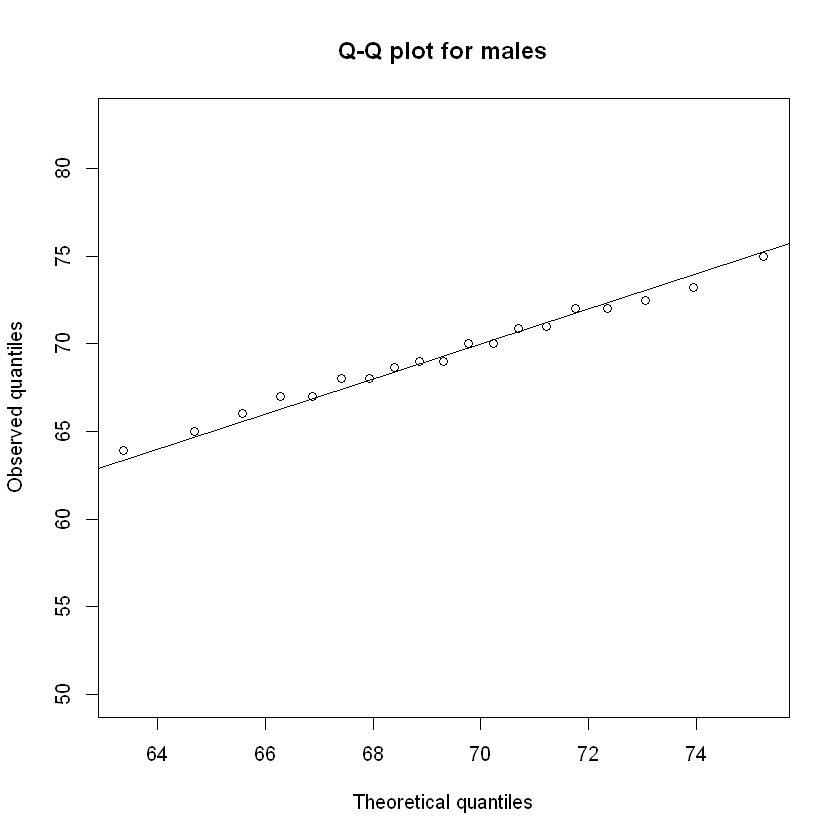

In [14]:
# Define a sequence of values of p
p = seq(0, 1, 0.05)

# Compute the observed quantile for this sequence for the male heights, using the built-in quantile function
qM_obs = quantile(male, p)

# Compute the theoretical quantile for the same, using the built-in qnorm function
qM_theo = qnorm(p, meanM, sdM)

# Check whether they match by drawing a q-q plot them
plot (qM_theo, qM_obs, xlab = "Theoretical quantiles", ylab = "Observed quantiles", main = "Q-Q plot for males")
abline (0, 1) # draw a line through the plot with intercept = 0 and slope = 1

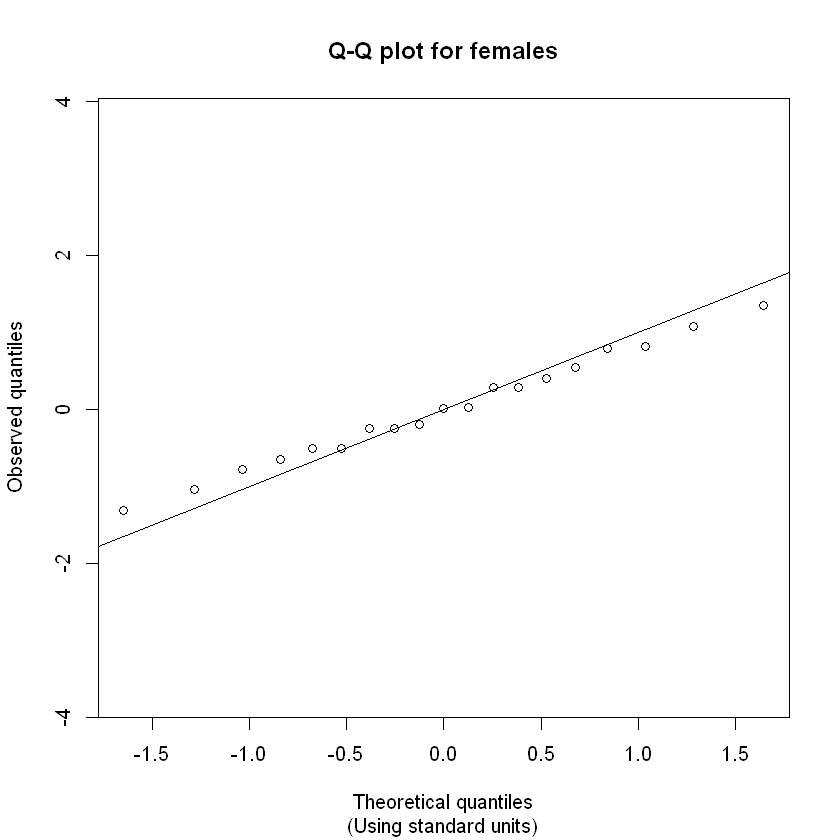

In [15]:
# Repeat the same for female heights, but use standard units instead of mean and SD

qF_obs = quantile (zF, p)
qF_theo = qnorm (p)
plot (qF_theo, qF_obs, 
      xlab = "Theoretical quantiles", 
      ylab = "Observed quantiles", 
      main = "Q-Q plot for females", 
      sub = "(Using standard units)"
)
abline(0,1)

## Percentiles

A **percentile** referes to a quantile expressed in percent.

Refer to the following table as an example.
<table>
    <thead>
        <th> quantile </th>
        <th> percentile </th>
    </thead>
    <tr>
        <td> 0.1 </td>
        <td> 10 % </td>
    </tr>
    <tr>
        <td> 0.25 </td>
        <td> 25 % </td>
    </tr>
    <tr>
        <td> 0.5 </td>
        <td> 50 % </td>
    </tr>
    <tr>
        <td> 0.75 </td>
        <td> 75 % </td>
    </tr>
    <tr>
        <td> 1 </td>
        <td> 100 % </td>
    </tr>
</table>

And so on.

The middle three rows, namely, 25 %, 50 % and 75 % are called **quartiles**.

The middle row, that is the 50th percentile, is called the **median** of the distribution.

## Boxplots

For those distributions that do not conform to the normal distribution, boxplots are an effective way of visualizing them.

A boxplot is a _five_-number summary that describe data:
1. The lower range
2. The upper range
3. The 25th percentile
4. The 50th percentile
5. The 75th percentile

Thus, **a boxplot is described by a distribution's range, and its quartiles.** 

The edge percentiles (25%, 75%) are shown in a box, with the median (50%) passing inside it, and the distance between them is called the _inter-qaurtile range_. The range is shown by whiskers outside the box on its Y-axis. 

Furthermore, we ignore **outliers**, or exceptions, while computing the range, and instead plot them as independent points.

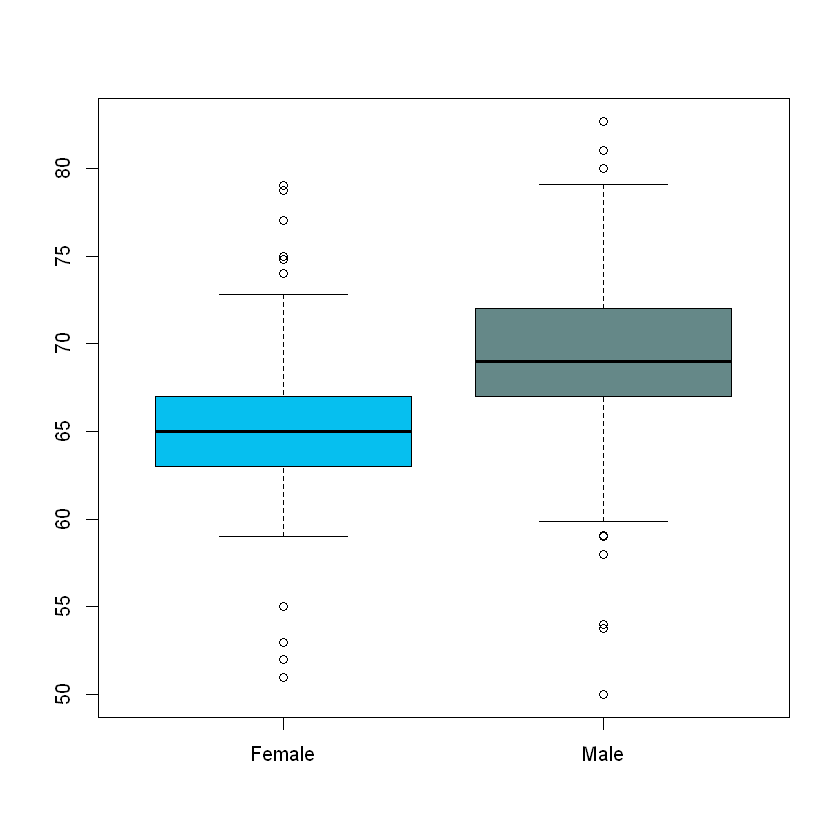

In [74]:
# Draw a boxplot for males wrt their heights
boxplot(height~sex, data = heights, col=randomColors(2))

## Reordering of vectors

Using the `reorder()` function that takes the following:

• factor variable, <br>
• values of each corresponding factor level, <br>
• FUNction to reorder the factor, <br>
    
and returns a new factor reordered as per the function provided in ascending order.

In [1]:
# Define a facor with 2 levels
fac = factor(c("Rafi", "Rafi", "Afiray", "Afiray"))
levels(fac)

[1] "Afiray" "Rafi"

In [4]:
val = c(4, 5, 12, 13) # values for each factor
fac = reorder(fac, val, FUN = mean) # reorder the factor levels in order of their means
levels(fac)

[1] "Rafi"   "Afiray"

The notebook ends here.